[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MrStrange545/ML-Engineer/blob/main/Notebooks/06_PyTorch.ipynb)

# PyTorch Introduction

## Importing Libraries

In [399]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

## Introduction to tensors

### Creating tensors

In [400]:
# Scalars
# creating one scalar whose value is 7 ans storing it in var scalar.
scalar = torch.tensor(7) 

In [401]:
# Attribute of tensor: ndim

# ndim returns the rank(Dimension) of the scalar
print("Rank of a Scalar:",scalar.ndim)

# item() returns the value the tensor
value = scalar.item()
print("Value of a zero-rank tensor:",value)

# dtype returns the data type,
print("The data type of the scalar:",scalar.dtype)


Rank of a Scalar: 0
Value of a zero-rank tensor: 7
The data type of the scalar: torch.int64


In [402]:
# Vectors
# creating one vector and storing
# it in var vector we can pass any 1 x n vector
vector = torch.tensor([7,8,9,10])

print("Rank of a Vector:",vector.ndim)

# shape returns the number of elements in the corresponding dimensions
# torch shape = numpy shape
print("Shape of the vector:",vector.shape)

Rank of a Vector: 1
Shape of the vector: torch.Size([4])


In [403]:
# MATRIX
MATRIX = torch.tensor([[7,8,5.2],
                       [9,10,6.3]])
print("The number of dimensions of this Matrix:",MATRIX.ndim)

# Accessing the elements of MATRIX = same as numpy
print("The zero-zero element of MATRIX:",MATRIX[0][0])

# Shape of the matrix
print("The shape of the matrix is:",MATRIX.shape)

The number of dimensions of this Matrix: 2
The zero-zero element of MATRIX: tensor(7.)
The shape of the matrix is: torch.Size([2, 3])


In [404]:
# TENSOR
TENSOR = torch.tensor([[[1,2,3],
                        [3,6,9],
                        [7,8,9]]])

print("The rank of the tensor:",TENSOR.ndim)

print("The shape of the tensor:",TENSOR.shape)

The rank of the tensor: 3
The shape of the tensor: torch.Size([1, 3, 3])


### Random Tensor

#### Why Random Tensors?
- Random tensors are important  because the way many neural networks learn is that they start with tensors full of random numbers and then adjust those random numbers to better represent data.

crux of neural network+s

`Start with random numbers -> look at data -> update random numbers -> look at data -> update random numbers`

In [405]:
# Creating a random tensors of size(3,4) or shape(3,4)
random_tensor = torch.rand(3,4)

print(random_tensor)

print("Number of dimensions:",random_tensor.ndim)

tensor([[0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936],
        [0.8694, 0.5677, 0.7411, 0.4294]])
Number of dimensions: 2


In [406]:
# Create a random tensor with similar shape to an image tensor
# size = (height, width, number of color channels(R,G,B)
random_image_size_tensor = torch.rand(size = (224,224,3))

print("The shape of image tensor:",random_image_size_tensor.shape)

print("The dimensions of image tensor:",random_image_size_tensor.ndim)

The shape of image tensor: torch.Size([224, 224, 3])
The dimensions of image tensor: 3


### Zeros and Ones

In [407]:
# Creating a tensor of all zero
zero = torch.zeros(size = (3,4))
print(zero)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [408]:
# Creating a tensor of all ones
ones = torch.ones(size = (3,4))
print(ones)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [409]:
# Let's say you have a tensor and you don't want specfic elements
# then you can simply mask them to zero. How ? see.

tensor = torch.rand(size = (3,4))
print(tensor)

# Now, I want to make the third column zero

zero = torch.zeros(size = (3,1))
print(zero)

# tensor[:, 2] select all rows(:) of the third column( 2 index) of the tensor
# zero.squeeze() removes the extra dimension (since dim(zero) = (3,1)  and 
# we need to it to match the shape (3,) for assignment).
tensor[:, 2] = zero.squeeze()

print(tensor)


tensor([[0.3078, 0.7786, 0.8016, 0.3649],
        [0.6286, 0.9663, 0.7687, 0.4566],
        [0.5745, 0.9200, 0.3230, 0.8613]])
tensor([[0.],
        [0.],
        [0.]])
tensor([[0.3078, 0.7786, 0.0000, 0.3649],
        [0.6286, 0.9663, 0.0000, 0.4566],
        [0.5745, 0.9200, 0.0000, 0.8613]])


### Creating tensors in range and tensors-like

In [410]:
# use torch.arange()
# It is exactly same as range
one_to_ten = torch.arange(start = 1, end = 11, step = 1)
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [411]:
# Creating tensors like
# basically it will create zero in the same fashion as the input
ten_zeros = torch.zeros_like(input = one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor Datatypes

**Note:** Tensor datatypes is one of the 3 big errors you'll run into with PyTorch & deep learning:
1. Tensors not right datatype
2. Tensors not right shape
3. Tensors not on the right device (means one tensor on "cpu" and another on "gpu" then there will be a error)

In [412]:
# Float 32 Tensor (Default)
float_32_tensor = torch.tensor([3.0,4,5],
                               dtype = None, #  the data type
                              device = None, #  def = "cpu" available = "cpu"/"cuda"
                              requires_grad = False) # whether or not to track gradients with this tensors operations 
float_32_tensor.dtype

torch.float32

In [413]:
float_16_tensor = float_32_tensor.type(torch.float16) # basically type conversion
float_16_tensor

tensor([3., 4., 5.], dtype=torch.float16)

### Getting information from tensors
1. tensor.dtype
2. tensor.shape
3. tensor.shape

In [414]:
x = torch.rand(size = (3,4))
print(x)
print(x.dtype)
print(x.device)
print(x.shape)

tensor([[0.0919, 0.3102, 0.9536, 0.6002],
        [0.0351, 0.6826, 0.3743, 0.5220],
        [0.1336, 0.9666, 0.9754, 0.8474]])
torch.float32
cpu
torch.Size([3, 4])


### Tensor Operations
Tensor Operations include:
- Addition
- Subtraction
- Scalar Multiplication 
- Division
- Matrix Multiplication

In [415]:
a = torch.arange(start = 1, end = 6)
b = torch.arange(start = 6, end  = 11)
print("Addition:",a+b) # Dimensions must be compatible
print("Subtraction:",a-b)
print("Mutliplication:",a*b)
print("Division:",a/b) # b must be non-zero
print("Matrix Multiplication:",a@b) # @ operator is used for dot product

Addition: tensor([ 7,  9, 11, 13, 15])
Subtraction: tensor([-5, -5, -5, -5, -5])
Mutliplication: tensor([ 6, 14, 24, 36, 50])
Division: tensor([0.1667, 0.2857, 0.3750, 0.4444, 0.5000])
Matrix Multiplication: tensor(130)


In [416]:
# create a tensor and add 10 to it
tensor = torch.tensor([1,2,3])
tensor+10,tensor*10,tensor-10

(tensor([11, 12, 13]), tensor([10, 20, 30]), tensor([-9, -8, -7]))

### PyTorch in-built Functions for operations

| Operation | Function                  |
|-----------|---------------------------|
| +         | `torch.add()`              |
| -         | `torch.sub()`  |
| *         | `torch.mul()` or `torch.multiply()` |
| /         | `torch.div()` |
| **        | `torch.pow()`              |
| sqrt      | `torch.sqrt()`             |
| exp       | `torch.exp()`              |
| log       | `torch.log()`              |
| abs       | `torch.abs()`              |
| sum       | `torch.sum()`              |
| mean      | `torch.mean()`             |
| max       | `torch.max()`              |
| min       | `torch.min()`              |
| matmul    | `torch.matmul()`           |
| reshape   | `torch.reshape()` or `.view()` |
| transpose | `torch.transpose()` or `.t()` or `.T` |


In [417]:
torch.mul(tensor,3.14)

tensor([3.1400, 6.2800, 9.4200])

In [418]:
torch.pow(tensor,5)

tensor([  1,  32, 243])

#### Matrix Multiplication
1. Element-wise
2. Matrix Multiplication ( Dot-Product)

##### Rules of Matrix Multiplication
1. The **inner dimensions** must match:
2. The resulting matrix has the shape of the **outer dimensions**:

In [419]:
# Element Wise
print("Scalar multiplication of",tensor,"with itself is ",tensor*tensor)

# Matrix Multiplication
print("Matrix multiplication of tensor is:",torch.matmul(tensor,tensor))

Scalar multiplication of tensor([1, 2, 3]) with itself is  tensor([1, 4, 9])
Matrix multiplication of tensor is: tensor(14)


In [420]:
# Matrix multiplication by hand 
A = torch.tensor([1,2,3])
B = torch.tensor([4,5,6])

# Now we have to multiply them elment wise
c = []
if len(A) == len(B):
    for i in range(len(A)):
        c.append(A[i]*B[i])

print(c) 

# the above process is very slow, use vectorized code
torch.matmul(A,B), 

[tensor(4), tensor(10), tensor(18)]


(tensor(32),)

In [421]:
### Example of error
x = torch.tensor([[1,2],
                  [3,4],
                  [5,6]])
# torch.matmul(x,x) this line will definitely raise an error as dim are not compatible
y = torch.tensor([[1,2],
                 [2,3]])
torch.matmul(x,y)

tensor([[ 5,  8],
        [11, 18],
        [17, 28]])

In [422]:
### Transpose of a matrix
## to find transpose of any matrix use tensor.t() or tensor.T
print(x)
print(x.T)
torch.matmul(x,x.T)

tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([[1, 3, 5],
        [2, 4, 6]])


tensor([[ 5, 11, 17],
        [11, 25, 39],
        [17, 39, 61]])

### Tensor Aggregation

In [423]:
# Create a tensor
x = torch.rand(size = (3,4))
print(x,"\n")
print("minimum:",x.min())
print("maximum:",x.max())
print("mean:",x.mean())
print("std:",x.std())
print("Sum:",x.sum())

tensor([[0.8988, 0.1105, 0.4563, 0.9719],
        [0.3968, 0.1496, 0.4743, 0.9973],
        [0.4436, 0.9726, 0.5194, 0.5337]]) 

minimum: tensor(0.1105)
maximum: tensor(0.9973)
mean: tensor(0.5771)
std: tensor(0.3124)
Sum: tensor(6.9249)


In [424]:
# Another way of doing the same things as above
# Create a tensor
x = torch.rand(size = (3,4))
print(x,"\n")
print("minimum:",torch.min(x))
print("maximum:",torch.max(x))
print("mean:",torch.mean(x))
print("std:",torch.std(x))
print("Sum:",torch.sum(x))

tensor([[0.7050, 0.3362, 0.7891, 0.1694],
        [0.1800, 0.7177, 0.6988, 0.5510],
        [0.2485, 0.8518, 0.0963, 0.1338]]) 

minimum: tensor(0.0963)
maximum: tensor(0.8518)
mean: tensor(0.4564)
std: tensor(0.2884)
Sum: tensor(5.4774)


**Note**: torch.mean() does not work with long data type

#### Positional max, min

In [425]:
# Find the position in tensor that has minimum value
x.argmin()

tensor(10)

In [426]:
# Find the position in tensor that has maximum value
x.argmax()

tensor(9)

### Reshaping, Stacking, Squeezing and unsqueezing tensors
- Reshaping - reshapes an input tensor to a defined shape
- View - Return a view of an input tensor of certain shape but keep the same memory as the origianl tensor
- Stacking - Concatenates a sequence of tensors along a new dimension.
- Squeeze - removes all `1` dimensions from a tensor
- Unsqueeze - add a `1` dimension to a target tensor
- Permute - Return a view of the input with dimensions permuted(swapped) in a certain way

In [427]:
# Creating a tensor
x = torch.arange(start = 1.,end = 11.)
x,x.shape

(tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]), torch.Size([10]))

In [428]:
# Add a extra dimension
x_reshaped = x.reshape(5,2)
x_reshaped

tensor([[ 1.,  2.],
        [ 3.,  4.],
        [ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])

In [429]:
# Change the view
z = x.view(1,10)
z,x

(tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]]),
 tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]))

In [430]:
# Changing z chnages x (bcz a view of a tensor shares the same memory as the origianl tensor)
z[:,0] = 999
z,x

(tensor([[999.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]]),
 tensor([999.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]))

In [431]:
# Stack tensors on top of each other
# dim = 0 -> stacking on top
# dim = 1 -> stackng side by side
x_stacked = torch.stack([x,x,x,x], dim = 0)
x_stacked

tensor([[999.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.],
        [999.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.],
        [999.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.],
        [999.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]])

In [432]:
# torch.squeeze - removes all single dimensions from a target tensor
x_reshaped.shape

torch.Size([5, 2])

In [433]:
x_reshaped = x_reshaped.reshape(1,1,1,1,2,1,1,5)
x_reshaped

tensor([[[[[[[[999.,   2.,   3.,   4.,   5.]]],


            [[[  6.,   7.,   8.,   9.,  10.]]]]]]]])

In [434]:
x_reshaped.shape

torch.Size([1, 1, 1, 1, 2, 1, 1, 5])

In [435]:
x_squeezed= x_reshaped.squeeze()
x_squeezed

tensor([[999.,   2.,   3.,   4.,   5.],
        [  6.,   7.,   8.,   9.,  10.]])

In [436]:
x_squeezed.shape

torch.Size([2, 5])

In [437]:
# Brief Visualization

# Before Squeezing
print("Previous tensor:",x_reshaped)
print("Shape of previous tensor:",x_reshaped.shape)

# After Squeezing
print() # for a blank line
print("Squeezed tensor:",x_squeezed)
print("Shape of Squeezed Tensor:",x_squeezed.shape)

Previous tensor: tensor([[[[[[[[999.,   2.,   3.,   4.,   5.]]],


            [[[  6.,   7.,   8.,   9.,  10.]]]]]]]])
Shape of previous tensor: torch.Size([1, 1, 1, 1, 2, 1, 1, 5])

Squeezed tensor: tensor([[999.,   2.,   3.,   4.,   5.],
        [  6.,   7.,   8.,   9.,  10.]])
Shape of Squeezed Tensor: torch.Size([2, 5])


In [438]:
# torch.unsqueeze() - adds a single dimension to a target tensor at a specific dim (dimension)
print("previous tensor:",x_squeezed)
print("Dimensions of previous tensor:",x_squeezed.shape)

# after unsqueezing, adding a extra dimension
print("Unsqueezed tensor:",x_squeezed.unsqueeze(dim =0))
print("Dimensions of unsqueezed tensor:",x_squeezed.unsqueeze(dim =0).shape)

previous tensor: tensor([[999.,   2.,   3.,   4.,   5.],
        [  6.,   7.,   8.,   9.,  10.]])
Dimensions of previous tensor: torch.Size([2, 5])
Unsqueezed tensor: tensor([[[999.,   2.,   3.,   4.,   5.],
         [  6.,   7.,   8.,   9.,  10.]]])
Dimensions of unsqueezed tensor: torch.Size([1, 2, 5])


In [439]:
# torch.permute -> rearranges the dimensions of a target tensor in a specified order
x_original = torch.rand(size = (224,224,3)) # h,w,color channels

# permute the original tensor to rearrange the axis

x_permuted = x_original.permute(2,0,1) # shifts axis 0 -> 1, 1-> 2, 2 -> 0

print("Previous shape:",x_original.shape)
print("Permuted shape:",x_permuted.shape)

Previous shape: torch.Size([224, 224, 3])
Permuted shape: torch.Size([3, 224, 224])


permute is a view of the original tensor

In [440]:
x_original[0,0,0] = 999
x_permuted[0,0,0]

tensor(999.)

### Indexing
Indexing with PyTorch is same as Indexing with NumPy

In [441]:
# create an tensor
x = torch.rand(size = (3,4,2))
x

tensor([[[1.9324e-01, 9.1184e-01],
         [1.4875e-01, 9.1283e-02],
         [4.4695e-01, 2.4397e-01],
         [5.5708e-01, 1.9275e-01]],

        [[6.0224e-02, 5.8370e-01],
         [8.6433e-04, 7.5808e-01],
         [5.8165e-01, 4.3382e-01],
         [3.3265e-02, 3.7463e-01]],

        [[7.1104e-01, 5.9461e-01],
         [9.4746e-01, 6.2281e-01],
         [7.6846e-02, 7.1221e-01],
         [3.7273e-01, 8.4340e-01]]])

In [442]:
x[0] # it gives a 2-D array as  x has 3  2-D arrays

tensor([[0.1932, 0.9118],
        [0.1488, 0.0913],
        [0.4470, 0.2440],
        [0.5571, 0.1928]])

In [443]:
x[0,0] # it gives the 1-D array at 0-th position

tensor([0.1932, 0.9118])

In [444]:
x[0,0,0] # it will give us the first scalar

tensor(0.1932)

we can also use `:` to select `all` of the target dimension

In [445]:
x[0,:,:] # equivalent to x[0]

tensor([[0.1932, 0.9118],
        [0.1488, 0.0913],
        [0.4470, 0.2440],
        [0.5571, 0.1928]])

In [446]:
x[:,0,0] # first entry in first 1-d Array in all 2-D array

tensor([0.1932, 0.0602, 0.7110])

In [447]:
# Get all values of 0th and 1st dimension but only index 1 of 2nd dimension
x[:,:,1]

tensor([[0.9118, 0.0913, 0.2440, 0.1928],
        [0.5837, 0.7581, 0.4338, 0.3746],
        [0.5946, 0.6228, 0.7122, 0.8434]])

### PyTorch and Numpy
- Numpy_array to PyTorch Tensor -> `torch.from_numpy(ndarray)`
- PyTorch tensor to Numpy array -> `torch.Tensor.numpy()`

In [448]:
# numpy arrays to tensor
arr = np.arange(1,9)
tensor = torch.from_numpy(arr)
tensor2 = torch.tensor(arr)
# both the above statements are same and do the same thing 
tensor.dtype, tensor2.dtype

(torch.int64, torch.int64)

In [449]:
# tensor to numpy
x = torch.rand(3)
# y = np.array(x)
y2 = x.numpy()

# both the above statements are same and do the same thing 
x,y2

(tensor([0.7186, 0.8834, 0.2827]),
 array([0.7185764 , 0.88338923, 0.28271377], dtype=float32))

In [450]:
x[0]=999
x,y

(tensor([9.9900e+02, 8.8339e-01, 2.8271e-01]),
 tensor([[1, 2],
         [2, 3]]))

### Pytorch Reproducibility
- trying to make random out of random

every time we run the cell, it gives new numbers

If we want to restrict randomness to some extent, then we have to use **seed**

Essentially what the random seed does is "flavour" the randomness.

In [451]:
# create two random tensors
random_tensor_A = torch.rand(size = (3,4))
random_tensor_B = torch.rand(size = (3,4))

print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)

tensor([[0.5312, 0.5058, 0.0712, 0.1094],
        [0.4695, 0.2574, 0.9830, 0.6780],
        [0.1739, 0.0130, 0.6778, 0.0439]])
tensor([[0.4367, 0.4731, 0.9129, 0.0017],
        [0.1279, 0.2028, 0.6808, 0.9808],
        [0.8409, 0.7430, 0.3531, 0.0833]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [452]:
# Let's make some random but reproducible tensors

# set the random seed
torch.manual_seed(42)
random_tensor_C = torch.rand((3,4))

torch.manual_seed(42)
random_tensor_D = torch.rand((3,4))

print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


So, basically for every seed value, random values are fixed universally, so if you have fixed the seed , then you will always get same output according to the seed
- This only works for one time just after declaring seed

### Usage of GPUs
GPUs = faster computation on numbers, thanks to CUDA + NVIDIA hardware + PyTorch working behind the scenes to make everything hunky dory(good)

Getting a GPU
1. Easiest - Use google colab (options to upgrade as well)
2. Use your own GPU - takes a little bit of setup and requires the investment of purchasing a GPU, there's lot of options (**only when your are earning**)
3. Use Cloud Computing - GCP, AWS, Azure (allow you to rent gpu and use them)

#### Check for GPU access with PyTorch

In [453]:
torch.cuda.is_available()

False

In [454]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [455]:
# count number of devices
torch.cuda.device_count() # count the number of gpus

0

It is recommended to setup device agnostic code 

E.g. run on GPU if available, else default to CPU

 #### Putting tensors (or models) on the CPU
The reason we want our tensors/models on the GPU is because using a GPU results in faster computations

In [456]:
# create a tensor (default on the CPU)
tensor = torch.tensor([1,2,3])

# Tensor not on gpu
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [457]:
# Move tensors to GPU if available
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3])

#### Moving tensor back to cpu
Numpy doesn't work with GPU

In [458]:
tensor_back_on_cpu = tensor_on_gpu.cpu()
tensor_back_on_cpu

tensor([1, 2, 3])

# A PyTorch Workflow

![workflow Image](Attachments/01_a_pytorch_workflow.png)

In [459]:
# Let's Explore an example of PyTorch end to end workflow.

pytorch_workflow = {1: "data (prepare and load",
                    2: "build model",
                    3: "fitting model to the data (training)",
                    4: "making predictions and evaluating a model (inference)",
                    5: "saving and loading a model",
                    6: "putting it all together"}
pytorch_workflow

{1: 'data (prepare and load',
 2: 'build model',
 3: 'fitting model to the data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [460]:
from torch import nn ## nn all building blocks for neural networks

## Data (preparing and loading)

Data can be anything... in machine learning.
- Excel Spreadsheet
- Images of any kind
- Videos
- Audio
- DNA
- Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula. (we are going to use *known* **parameters**.

In [461]:
# Create known parameters
w = 0.7 # (weight equiv to a in y = ax+b)
b = 0.3 # (bias equiv to b in y = ax+b)

# we know these parameters, but we want to create a model that will predict these numbers.

# Create data 
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim = 1) # unsqueeze -> adding one extra dimension
y = w*X+b

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [462]:
 len(X), len(y)

(50, 50)

### Training and validation sets
splitting data into training set, validation set and test set.

Generalization: 
>*The ability for a machine learning model to perform well on data it hasn't seen*

| Split | Purpose | Amount of data | How often is it used?|
|---|---|---|---|
| Training set| The models learns from this data | ~ 60-80% | always|
| Validation set | the model get tuned on this data | ~10-20%|Often but not always |
| Test set | the model get evaluated on this data to test what it has learned | ~10-20% | always|

In [463]:
# Let's create  a training set and test test with our data

# create a training set
train_split = int(0.8 * len(X)) # output is 40

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# this is just one way of out of many ways to split the data

len(X_train), len(y_train) , len(X_test), len(y_test)

(40, 40, 10, 10)

### Building a function to visualize our data

In [464]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize = (10,7))

    # plot training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label = "Training data")

    # plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing data")

    if predictions is not None:
        # plot the predictions if they exist
        plt.scatter(test_data,predictions, c= "r", s=4, label = "predicitons")

    # show the legend
    plt.legend(prop={"size":14})

    # show the plot
    plt.show()

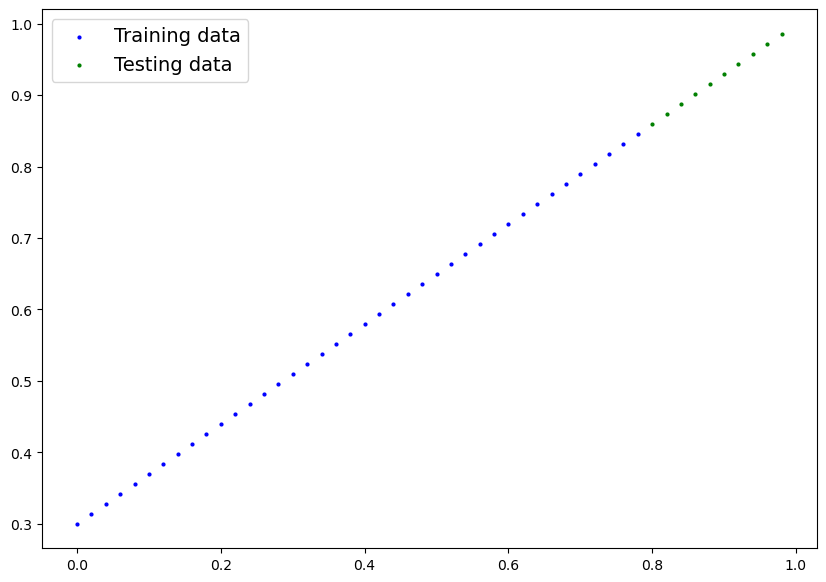

In [465]:
plot_predictions()

#### PyTorch model building essentials
- `torch.nn` - contains all of the building blocks for computational graphs (a neural network can be consider as a computational graph)
- `torch.nn.Parameter` - what parameter should our model try and learn, often a PyTorch layer from torch.nn will set these for us
- `torch.nn.Module` - if you subclass it, you should overwrite `forward()`
- `torch.optim` - this where the optimizers in pytorch live, they will help in gradient descent
- `def forward()` - all nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

Things to keep in mind: (summary)
- `nn.parameter()` arguments are tensor, requires_grad = True if the parameter requires gradient else False (by def it is True).
- `nn.Module` subclass nn.Module this contains all the building blocks for neural networks

In [466]:
### Creating our first PyTorch model for linear regression
# create linear regression model class

class LinearRegressionModel(nn.Module): # <-almost everything in Pytorch inherits from nn.Module
    def __init__(self):
        super().__init__()

        # initialise model parameters
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        
    # Forward method to define the computation in the model
    def  forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weights * x + self.bias 
        
    # requires_grad = True because we are going to use gradient descent algorithm
    

**What our model does?**
- Start with random values as parameters
- look at training data and adjust the random values to better represent (or get closer to ) the ideal values (the weight & bias values we used to create the data.

So, Basically we assign the random values to our parameters and consecutively applying gradient descent we can adjust these parameters so that the cost function can be minimum.

**How does it do so?**

Through two main algorithms:
1. Gradient descent
2. Backpropagation



#### Checking the contents of our Pytorch model

In [480]:
# create a random seed
torch.manual_seed(42)

# create an instance of the model (this is a subclass of nn.Module
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [481]:
# List named Parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

To heck our model's predictive power, lets's see how well it predicts 'y_test' based on 'X_test'

> torch.no_grad() is exactly same as torch.inference_mode(). However inference_mode is preferred

In [482]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

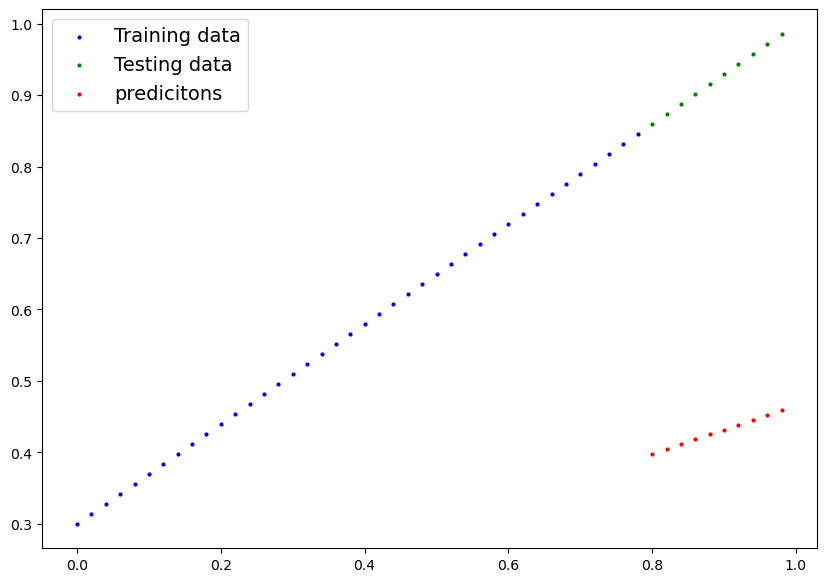

In [483]:
plot_predictions(predictions = y_preds)

When these red dots are over green ones, then it means our model is fine tuned

### Train Model
The whole idea of training is for a model to move from some unknown parameters (these may be random) to some known(Ideal)  parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

- Note: Loss function may also be called cost function

Things we need to train:

- **Loss Function:** A function how wrong your model's predictions are  to the ideal outputs, lower is better.

- **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias) to minimize the loss function

And Specifically for PyTorch, we need:
- A training loop
- A testing loop

In [484]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [485]:
# Check out our model's Parameters ( a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [486]:
# Setup a loss function
loss_fn = nn.L1Loss() # L1Loss = Mean Absolute Error = mean(abs(y_preds-y))

# Setup a optimizer   # the work of optimizer is to minimize the loss function
# SGD = stochastic Gradient Descent
optimizer = torch.optim.SGD(params = model_0.parameters(), # Model Parameters
                            lr = 0.01)  # lr = Learning rate (imp hyperparameter)



> Parameter: It is a value that the model sets by itself.

> Hyperparameter: It is a value that we sets for the model.

### Building a training loop(and a testing loop) in PyTorch

A Couple of things we need in a training loop:
1. Loop through the data
2. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
3. Calculate the loss (compare forward pass predictions to ground truth tabels)
4. Optimizer zero grad
5. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss **backpropagation**
6. Optmizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**Gradient Descent**)

In [487]:
# An epoch is one loop through the data... (this is a hyperparameter, because we've set this ourselves)
epochs = 190

# Setup empty lists to keep track 
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 1. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode in pytorch sets all parameters that requires gradients to require gradients

    # 2. Forward Pass
    y_preds = model_0(X_train)

    # 3. Calculate the loss
    loss = loss_fn(y_preds,y_train)

    # 4. Optimizer zero grad
    optimizer.zero_grad()

    # 5. Perform backprogpgation on the loss wrt parameters of the model
    loss.backward()

    # 6. Step the optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will accumulate through the loop we have to zero them above in step 4 for the next iteration of the loop

    #Testing
    model_0.eval() # turns off  different settings not needed for evaluation
    with torch.inference_mode(): # turns off gradient tracking & couple more things
        # 1. Do the forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the test loss
        test_loss = loss_fn(test_pred,y_test)

    # print out what's happenin'
    if epoch %30 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | loss: {loss} | Test loss: {test_loss}")
print(model_0.state_dict())

Epoch: 0 | loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 30 | loss: 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch: 60 | loss: 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch: 90 | loss: 0.02788739837706089 | Test loss: 0.06473556160926819
Epoch: 120 | loss: 0.01758546568453312 | Test loss: 0.04060482233762741
Epoch: 150 | loss: 0.0072835334576666355 | Test loss: 0.016474086791276932
Epoch: 180 | loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict({'weights': tensor([0.6990]), 'bias': tensor([0.3093])})


#### Things to know:
- `epochs`
   - The number of times the entire training dataset will be passed through the model during training.
   - This is the hyperparameter which we set.
- `model_0`
   - This is neural network model, which is an instance of a class derived from `torch.nn.Module`
   - This model is used to perform the forward pass to compute predictions and to update weights during the training loop
- `loss_fn`
   - The loss function used to measure the error between the predicted values and the true values.
- `optimizer` An algorithm to update the model's parameter based on the computed gradients to minimize the loss.
- `model_0.train()`
   - This sets the model to training mode
   - This activates certain layers like dropout and batch normalization that behave diffrently during training compared to evaluation.
- `optimizer.zero_grad()`
   - this clears old gradients from the last step (otherwise, gradients would accumulate)
   - Gradient accumulation occurs by default in PyTorch, so it's necessary to clear the gradients before computing new ones for each training iteration.

In [497]:
# when plotting curve with matplotlib, it does not work on tensors.
# Therefore, we first convert the list of tensors to a single tensor, 
# then to NumPy array, to make it compatible with Matplotlib

loss_values = np.array(torch.tensor(loss_values).numpy())
test_loss_values = np.array(torch.tensor(test_loss_values).numpy())

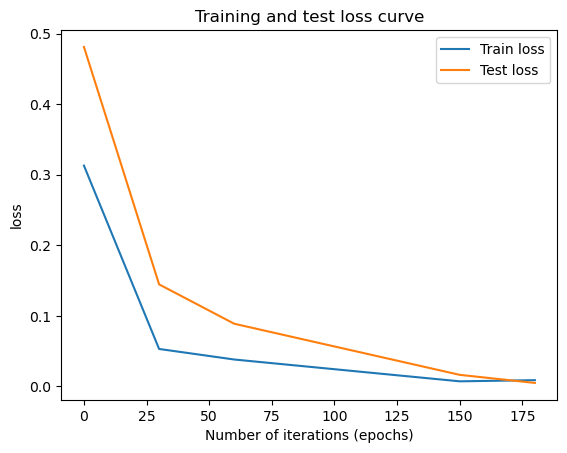

In [498]:
# plot the loss curve
plt.plot(epoch_count, loss_values, label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test loss curve")

plt.xlabel("Number of iterations (epochs)")
plt.ylabel("loss")
plt.legend()
plt.show()


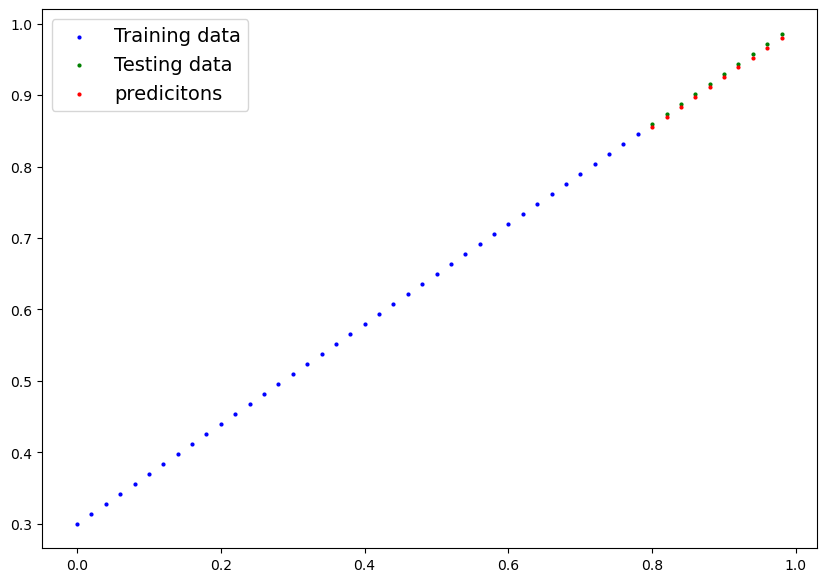

In [500]:
plot_predictions(predictions=y_preds_new)

### Saving a model in PyTorch
There are Three main methods you should know about for saving and loading models in pyTorch.
1. `torch.save()`-allows you save a PyTorch object in python's pickle format.
2. `torch.load()`-allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()`-this allows to load a model's saved state dictionary

In [503]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
model_path = Path("Models")
model_path.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
model_name = "01_pytorch_workflow.pt"
model_save_path = model_path / model_name

# 3. Save the model state dict
print(f"Saving model to:{model_save_path}")
torch.save(obj=model_0.state_dict(), f = model_save_path)

Saving model to:Models/01_pytorch_workflow.pt


In [505]:
!ls -l Models

total 4
-rw-rw-r-- 1 apple apple 1568 Sep 14 19:39 01_pytorch_workflow.pt


### Loading a PyTorch Model
Since we saved our model's `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the `saved state_dict()` into that.

In [513]:
# to load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# load the saved state_dict of model_0 (this will update the new instance with updated parameters
loaded_model_0.load_state_dict(torch.load(f=model_save_path, weights_only = True))

<All keys matched successfully>

In [514]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [515]:
# make some predictions with our loaded models
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds 

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [519]:
# make some model preds
model_0.eval()
with torch.inference_mode():
    y_preds_new_2 = model_0.forward(X_test)


In [520]:
# compare loaded model preds with original model preds
y_preds_new_2 == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Putting it all together
Let's go back through the steps above and use it all in one place

epoch: 0 | Training Loss: 0.5643115043640137 | Test Loss: 0.5468398332595825
epoch: 20 | Training Loss: 0.307809054851532 | Test Loss: 0.2986776828765869
epoch: 40 | Training Loss: 0.05415981262922287 | Test Loss: 0.0585641972720623
epoch: 60 | Training Loss: 0.03326888754963875 | Test Loss: 0.03719980642199516
epoch: 80 | Training Loss: 0.02364148572087288 | Test Loss: 0.02609860897064209
epoch: 100 | Training Loss: 0.014038758352398872 | Test Loss: 0.015263624489307404
epoch: 120 | Training Loss: 0.004438179545104504 | Test Loss: 0.004453438334167004
epoch: 140 | Training Loss: 0.010823393240571022 | Test Loss: 0.0018895029788836837
epoch: 160 | Training Loss: 0.010823393240571022 | Test Loss: 0.0018895029788836837
epoch: 180 | Training Loss: 0.010823393240571022 | Test Loss: 0.0018895029788836837


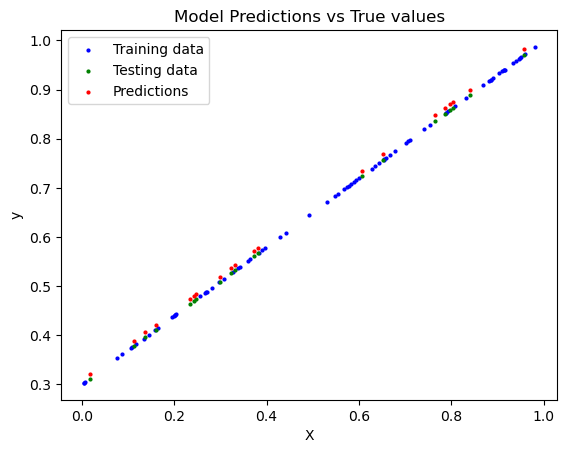

In [578]:
# 1. importing Libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


# 2. Setting up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"


# 3. Importing data
## Here , we are creating some dummy data
torch.manual_seed(42)
X = torch.rand(100).unsqueeze(dim=1) #  creating a (input) tensor of 100 values and unsqueezing it to shape (100,1) 
weight, bias = 0.7,0.3 # Ideal parameters which we will not actually know
y = weight * X + bias # Creating labels for the inputs


# 4. Splitting Data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]



# 5. build the model
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        ## use nn.Linear() for creating the model parameters
        self.Linear_layer = torch.nn.Linear(in_features = 1,
                                            out_features = 1)
    def forward(self, X: torch.Tensor) -> torch.Tensor:
        return self.Linear_layer(X)
        
# Initialize the model and move it to the target device
torch.manual_seed(42)
model_0 = LinearRegressionModel().to(device)

# set the data to target device
X_train,y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Setup loss function and optimizer
loss_fn = torch.nn.L1Loss() # MAE
optimizer = torch.optim.SGD(params = model_0.parameters(),lr = 0.01)

# Training loop
epochs = 200
for epoch in range(epochs):
    model_0.train() # set the model to training mode

    # Forward pass
    train_predictions = model_0(X_train)

    # Calculate loss
    loss = loss_fn(train_predictions, y_train)

    # zero the gradients, perform backpropagation, and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    
    # Testing
    # set the model to test mode
    model_0.eval()
    with torch.inference_mode():
        test_predictions = model_0(X_test)
        test_loss = loss_fn(test_predictions, y_test)


    # monitoring the model
    if epoch % int(epochs*0.1) == 0:
        print(f"epoch: {epoch} | Training Loss: {loss.item()} | Test Loss: {test_loss}") 

def plot_predictions(X_train = X_train,
                     y_train = y_train,
                     X_test = X_test,
                     y_test = y_test,
                     predictions =None):
    plt.figure()
    plt.scatter(X_train.cpu(),y_train.cpu(), s=4,c="b",label = "Training data")

    plt.scatter(X_test.cpu(),y_test.cpu(),s=4,c="g",label="Testing data")

    if test_predictions is not None:
        plt.scatter(X_test.cpu(),predictions.cpu(),s=4,c="r", label = "Predictions")
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Model Predictions vs True values")
    plt.show()

# plotting predictions
plot_predictions(predictions = test_predictions)

## Saving the model
filepath = Path(r"Models/01_pytorch_workflow.pt")
filepath.parent.mkdir(parents=True, exist_ok=True) # create directory if it does not exist 
torch.save(obj=model_0.state_dict(), f=filepath)

In [562]:
# load a pytorch model

# create a new instance of linearRegressionModel
model_1 = LinearRegressionModel()

In [563]:
model_1.state_dict()

OrderedDict([('Linear_layer.weight', tensor([[-0.2343]])),
             ('Linear_layer.bias', tensor([0.9186]))])

In [568]:
## Load the saved state_dict of model_0
model_1.load_state_dict(torch.load(filepath,weights_only = True))

<All keys matched successfully>

In [569]:
model_1.state_dict()

OrderedDict([('Linear_layer.weight', tensor([[0.5974]])),
             ('Linear_layer.bias', tensor([0.1963]))])

In [570]:
model_1.to(device)

LinearRegressionModel(
  (Linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

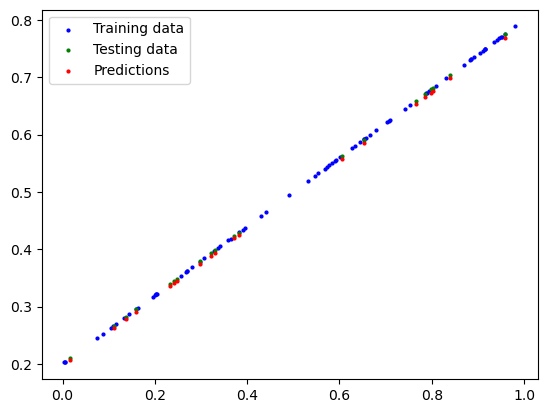

In [575]:
# Evaluate the loaded model
model_1.eval()
with torch.inference_mode():
    evaluated_predictions = model_1(X_test)
plot_predictions(predictions = evaluated_predictions)

# Neural Network Classification with pytorch